# Implement a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

load the dataset

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


feature selection and pre-processing

In [7]:
features = ['sqft_living', 'bedrooms', 'bathrooms']
target = ['price']

df = df[features + target]

In [8]:
df

,sqft_living,bedrooms,bathrooms,price
0,1340,3.0,1.50,3.130000e+05
1,3650,5.0,2.50,2.384000e+06
2,1930,3.0,2.00,3.420000e+05
3,2000,3.0,2.25,4.200000e+05
4,1940,4.0,2.50,5.500000e+05
...,...,...,...,...
4595,1510,3.0,1.75,3.081667e+05
4596,1460,3.0,2.50,5.343333e+05
4597,3010,3.0,2.50,4.169042e+05
4598,2090,4.0,2.00,2.034000e+05


In [9]:
df.isnull().sum()

sqft_living    0
bedrooms       0
bathrooms      0
price          0
dtype: int64

data splitting

In [10]:
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train the model

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

evaluate the model

In [12]:
y_pred = model.predict(X_test)

In [13]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [14]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 991204834716.47
R² Score: 0.03


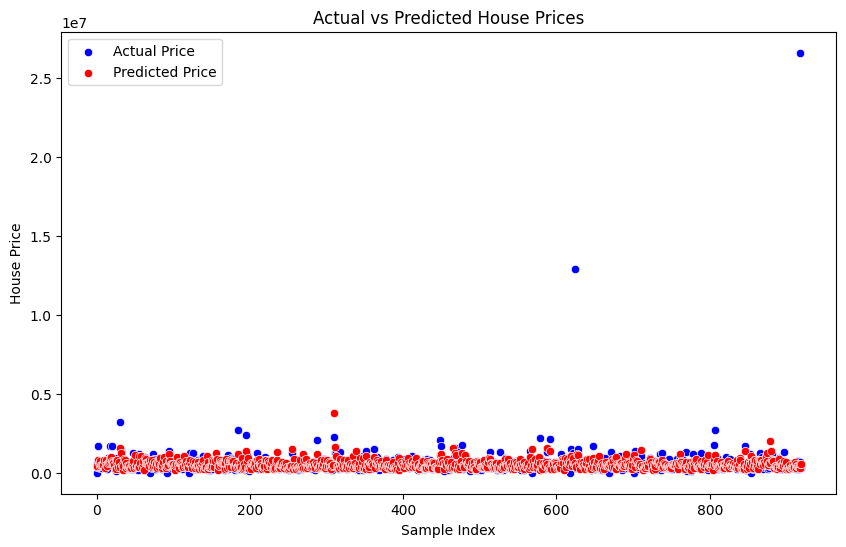

In [17]:
plt.figure(figsize=(10, 6))


index = range(len(y_test))


sns.scatterplot(x=index, y=y_test.values.flatten(), color='blue', label='Actual Price')


sns.scatterplot(x=index, y=y_pred.flatten(), color='red', label='Predicted Price')

plt.xlabel("Sample Index")
plt.ylabel("House Price")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.show()